In [1]:
# https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

1. 라이브러리

In [2]:
import tensorflow as tf

2. 데이터 준비
  - MNIST 데이터 셋
  - 손글씨 이미지, 60,000장 훈련데이터, 10,000장 테스터 데이트
  - 28 * 28 픽셀, 흑백 이미지

In [36]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
y_train.shape

(60000,)

In [39]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [40]:
x_train[0][5:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

3. 이미지 글씨 확인

label은 =  5


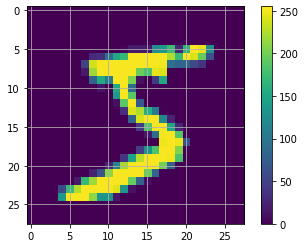

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False) #격자 표시
plt.grid(True) #격자 표시
print("label은 = ", y_train[0])

label은 =  5


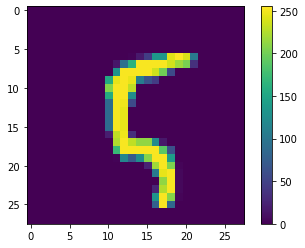

In [42]:
import matplotlib.pyplot as plt

i = 100

plt.figure()
plt.imshow(x_train[i])
plt.colorbar()
plt.grid(False) #격자 표시
# plt.grid(True) #격자 표시
print("label은 = ", y_train[i])

In [43]:
def draw_train(no):
    plt.figure() #옵션이다. 없어도 상관없음.
    plt.imshow(x_train[no])
    plt.colorbar()
    plt.grid(False) #격자 표시
    # plt.grid(True) #격자 표시
    print("train label은 = ", y_train[no])
    
def draw_test(no):
    plt.figure() #옵션이다. 없어도 상관없음.
    plt.imshow(x_train[no])
    plt.colorbar()
    plt.grid(False) #격자 표시
    # plt.grid(True) #격자 표시
    print("test label은 = ", y_train[no])

train label은 =  4


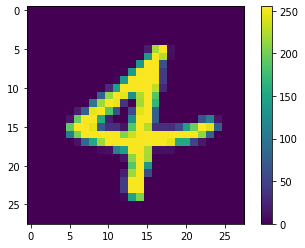

In [44]:
draw_train(150)

test label은 =  0


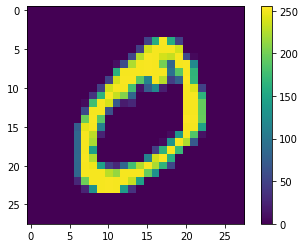

In [45]:
draw_test(1)

4. 데이터 전처리
   - 픽셀갑의 범위가 0~255 사이
   - 0 ~ 1 사이로 변경

In [46]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [62]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

5. 층을 쌓아서 모델을 구성
   - 옵티마이저와 손실 함수 선택

In [53]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #1차원으로 풀어놓는다.
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

6. 모델 훈련

In [57]:
model.fit(X_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2917 - accuracy: 0.9152
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1400 - accuracy: 0.9580
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1054 - accuracy: 0.9679
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0875 - accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0732 - accuracy: 0.9765


7. 평가

In [59]:
model.evaluate(X_test, y_test, verbose = 2) # verbose는 옵션이다. 어떻게 표현할지

10000/10000 - 0s - loss: 0.0709 - accuracy: 0.9792


[0.07094499257928692, 0.9792]

8. 테스트 데이터 예측

In [66]:
predictions = model.predict(X_test)
predictions[0]

array([4.6537528e-07, 4.4789306e-08, 4.6957284e-06, 1.3136763e-04,
       3.1629582e-10, 6.6358172e-07, 2.8752710e-12, 9.9984241e-01,
       1.0064628e-07, 2.0226735e-05], dtype=float32)

In [69]:
import numpy as np
np.argmax(predictions[0])

7

In [70]:
y_test[0]

7

test label은 =  5


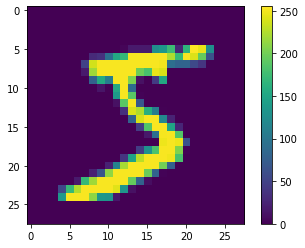

In [73]:
draw_test(0)

9. 배포(실제 적용 단계)
    - 손으로 쓴 이미지를 input_image (28*28)
    - input_image / 255.0
    - model.predict(input_image)
    - 결과값이?